In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
from matplotlib.ticker import NullFormatter
import sys
import scipy
from __future__ import print_function, division

import os
import math
import time

from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, AutoLocator, AutoMinorLocator
from matplotlib import gridspec
from matplotlib import cm

In [2]:
import xpsi

/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 1.2.1               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 0.3.1
Imported nestcheck version: 0.2.0


In [3]:
from xpsi.global_imports import _c, _G, _dpr, gravradius, _csq, _km, _2pi

In [4]:
bounds = dict(distance = (0.1, 1.0),                     # (Earth) distance
                mass = (1.0, 3.0),                       # mass
                radius = (3.0 * gravradius(1.0), 16.0),  # equatorial radius
                cos_inclination = (0.0, 1.0))      # (Earth) inclination to rotation axis

spacetime = xpsi.Spacetime(bounds=bounds, values=dict(frequency=300.0))

Creating parameter:
    > Named "frequency" with fixed value 3.000e+02.
    > Spin frequency [Hz].
Creating parameter:
    > Named "mass" with bounds [1.000e+00, 3.000e+00].
    > Gravitational mass [solar masses].
Creating parameter:
    > Named "radius" with bounds [4.430e+00, 1.600e+01].
    > Coordinate equatorial radius [km].
Creating parameter:
    > Named "distance" with bounds [1.000e-01, 1.000e+00].
    > Earth distance [kpc].
Creating parameter:
    > Named "cos_inclination" with bounds [0.000e+00, 1.000e+00].
    > Cosine of Earth inclination to rotation axis.


In [5]:
filename = '/home/pushpita/Documents/codes_dir/3D_Build/final_runs/inclination_60deg/data_r+0.400D+01_n0324.csv'

In [6]:
bounds = dict(super_colatitude = (None, None),
              super_radius = (None, None),
              phase_shift = (0.0, 0.1),
              super_temperature = (None, None))

primary = xpsi.HotRegion(bounds=bounds,
	                    values={},
	                    symmetry=True,
	                    omit=False,
	                    cede=False,
	                    concentric=False,
	                    sqrt_num_cells=128,
	                    min_sqrt_num_cells=10,
	                    max_sqrt_num_cells=128,
	                    num_leaves=100,
	                    num_rays=200,
	                    prefix='p',
						mycoolgrid = True,
						first_spot = True,
                        filename=filename)

Creating parameter:
    > Named "super_colatitude" with bounds [0.000e+00, 3.142e+00].
    > The colatitude of the centre of the superseding region [radians].
Creating parameter:
    > Named "super_radius" with bounds [0.000e+00, 1.571e+00].
    > The angular radius of the (circular) superseding region [radians].
Creating parameter:
    > Named "phase_shift" with bounds [0.000e+00, 1.000e-01].
    > The phase of the hot region, a periodic parameter [cycles].
Creating parameter:
    > Named "super_temperature" with bounds [3.000e+00, 7.600e+00].
    > log10(superseding region effective temperature [K]).


In [7]:
secondary = xpsi.HotRegion(bounds=bounds,
                              values={}, # no fixed/derived variables
                              symmetry=True,
                              omit=False,
                              cede=False,
                              concentric=False,
                              sqrt_num_cells=128,
                              min_sqrt_num_cells=10,
                              max_sqrt_num_cells=128,
                              num_leaves=100,
                              num_rays=200,
                              do_fast=False,
                              is_secondary=False,
                              is_antiphased=True,
                              prefix='s',
                              mycoolgrid = True,
                              second_spot = True,
                              filename = filename)

from xpsi import HotRegions

hot = HotRegions((primary, secondary))

Creating parameter:
    > Named "super_colatitude" with bounds [0.000e+00, 3.142e+00].
    > The colatitude of the centre of the superseding region [radians].
Creating parameter:
    > Named "super_radius" with bounds [0.000e+00, 1.571e+00].
    > The angular radius of the (circular) superseding region [radians].
Creating parameter:
    > Named "phase_shift" with bounds [0.000e+00, 1.000e-01].
    > The phase of the hot region, a periodic parameter [cycles].
Creating parameter:
    > Named "super_temperature" with bounds [3.000e+00, 7.600e+00].
    > log10(superseding region effective temperature [K]).


In [8]:
elsewhere = xpsi.Elsewhere(sqrt_num_cells=64,bounds=dict(elsewhere_temperature = (None,None)),
                           mycoolgrid=True,
                           myelsewhere=True,
                           filename=filename)

Creating parameter:
    > Named "elsewhere_temperature" with bounds [3.000e+00, 7.600e+00].
    > log10 of the effective temperature elsewhere.


In [9]:
photosphere = xpsi.Photosphere(hot = hot, elsewhere = elsewhere,
                               values=dict(mode_frequency = spacetime['frequency']))
star = xpsi.Star(spacetime = spacetime, photospheres = photosphere)
star

Creating parameter:
    > Named "mode_frequency" with fixed value 3.000e+02.
    > Coordinate frequency of the mode of radiative asymmetry in the
photosphere that is assumed to generate the pulsed signal [Hz].


Free parameters
---------------
mass: Gravitational mass [solar masses].
radius: Coordinate equatorial radius [km].
distance: Earth distance [kpc].
cos_inclination: Cosine of Earth inclination to rotation axis.
p__phase_shift: The phase of the hot region, a periodic parameter [cycles].
p__super_colatitude: The colatitude of the centre of the superseding region [radians].
p__super_radius: The angular radius of the (circular) superseding region [radians].
p__super_temperature: log10(superseding region effective temperature [K]).
s__phase_shift: The phase of the hot region, a periodic parameter [cycles].
s__super_colatitude: The colatitude of the centre of the superseding region [radians].
s__super_radius: The angular radius of the (circular) superseding region [radians].
s__super_temperature: log10(superseding region effective temperature [K]).
elsewhere_temperature: log10 of the effective temperature elsewhere.

In [10]:
p = [1.4,
     12.5,
     0.2,
     math.cos(2.5),
     0.0,
     0.0,
     math.pi/2 - 0.05,
     6.2,
     0.0,
     math.pi,
     math.pi/2-0.05,
     6.2,
     5.0]

star(p)
star.params

[Gravitational mass [solar masses] = 1.400e+00,
 Coordinate equatorial radius [km] = 1.250e+01,
 Earth distance [kpc] = 2.000e-01,
 Cosine of Earth inclination to rotation axis = -8.011e-01,
 The phase of the hot region, a periodic parameter [cycles] = 0.000e+00,
 The colatitude of the centre of the superseding region [radians] = 0.000e+00,
 The angular radius of the (circular) superseding region [radians] = 1.521e+00,
 log10(superseding region effective temperature [K]) = 6.200e+00,
 The phase of the hot region, a periodic parameter [cycles] = 0.000e+00,
 The colatitude of the centre of the superseding region [radians] = 3.142e+00,
 The angular radius of the (circular) superseding region [radians] = 1.521e+00,
 log10(superseding region effective temperature [K]) = 6.200e+00,
 log10 of the effective temperature elsewhere = 5.000e+00]

In [11]:
rcParams['text.usetex'] = False
rcParams['font.size'] = 14.0

def veneer(x, y, axes, lw=1.0, length=8, yticks=None):
    """ Make the plots a little more aesthetically pleasing. """
    if x is not None:
        if x[1] is not None:
            axes.xaxis.set_major_locator(MultipleLocator(x[1]))
        if x[0] is not None:
            axes.xaxis.set_minor_locator(MultipleLocator(x[0]))
    else:
        axes.xaxis.set_major_locator(AutoLocator())
        axes.xaxis.set_minor_locator(AutoMinorLocator())

    if y is not None:
        if y[1] is not None:
            axes.yaxis.set_major_locator(MultipleLocator(y[1]))
        if y[0] is not None:
            axes.yaxis.set_minor_locator(MultipleLocator(y[0]))
    else:
        axes.yaxis.set_major_locator(AutoLocator())
        axes.yaxis.set_minor_locator(AutoMinorLocator())

    axes.tick_params(which='major', colors='black', length=length, width=lw)
    axes.tick_params(which='minor', colors='black', length=int(length/2), width=lw)
    plt.setp(axes.spines.values(), linewidth=lw, color='black')

    if yticks:
        axes.set_yticks(yticks)

def plot_pulse():
    """ Plot hot region signals before telescope operation. """
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)

    ax.set_ylabel('Signal [arbitrary normalisation]')
    ax.set_xlabel('Phase [cycles]')

    temp = np.sum(photosphere.signal[0][0], axis=0)
    ax.plot(hot.phases_in_cycles[0], temp/np.max(temp), 'o-', color='k', lw=0.5, markersize=2)
    temp = np.sum(photosphere.signal[1][0], axis=0)
    ax.plot(hot.phases_in_cycles[1], temp/np.max(temp), 'o-', color='r', lw=0.5, markersize=2)

    #veneer((0.05,0.2), (0.05,0.2), ax)

6.768899106800814
Interpolated min T 6.768899106800814 Code min T 6.768620163497843
XPSI Theta corresponding to min T [0.76119764]
BHAC theta corresponding to min T [0.72687832]
BHAC Phi corresponding to min T [1.6755161]
XPSI Phi corresponding to min T [1.69351479]
[-3.11704896 -3.06796158 -3.01887419 -2.96978681 -2.92069942 -2.87161203
 -2.82252465 -2.77343726 -2.72434988 -2.67526249 -2.62617511 -2.57708772
 -2.52800034 -2.47891295 -2.42982557 -2.38073818 -2.3316508  -2.28256341
 -2.23347603 -2.18438864 -2.13530126 -2.08621387 -2.03712649 -1.9880391
 -1.93895172 -1.88986433 -1.84077695 -1.79168956 -1.74260218 -1.69351479
 -1.6444274  -1.59534002 -1.54625263 -1.49716525 -1.44807786 -1.39899048
 -1.34990309 -1.30081571 -1.25172832 -1.20264094 -1.15355355 -1.10446617
 -1.05537878 -1.0062914  -0.95720401 -0.90811663 -0.85902924 -0.80994186
 -0.76085447 -0.71176709 -0.6626797  -0.61359232 -0.56450493 -0.51541754
 -0.46633016 -0.41724277 -0.36815539 -0.319068   -0.26998062 -0.22089323
 -0.

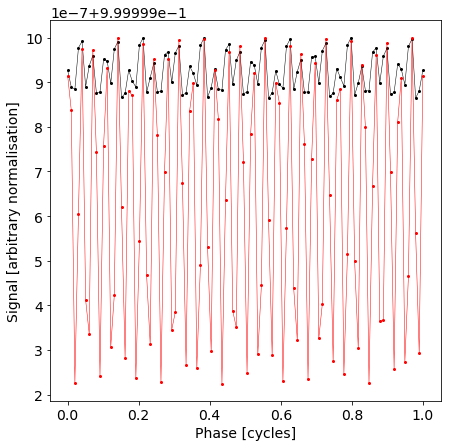

In [12]:
star['cos_inclination'] = math.cos(2.13)
star.update(force_update=True)
#d = photosphere.embed
energies = np.logspace(-1.0, np.log10(3.0), 128, base=10.0)
photosphere.integrate(energies, threads=1) # the number of OpenMP threads to use
_ = plot_pulse()

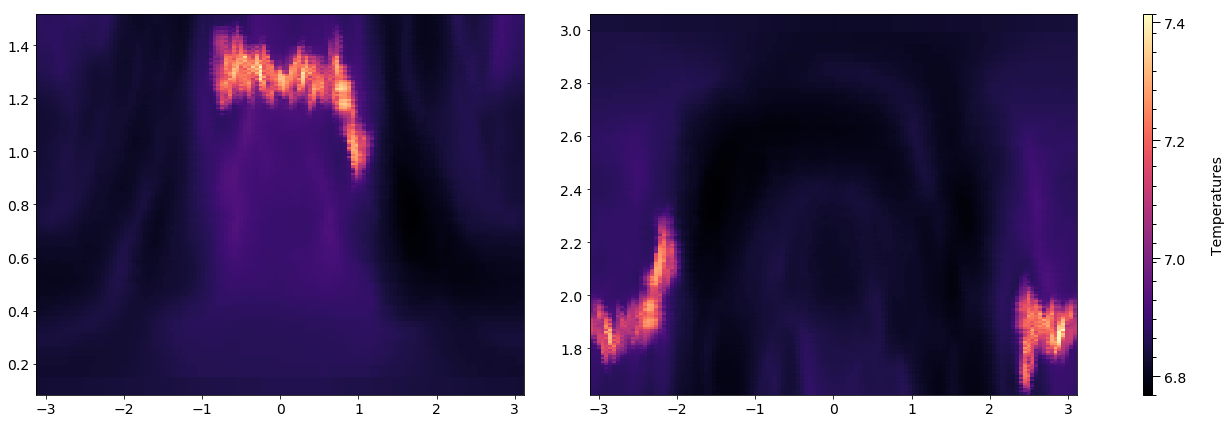

In [13]:
fig = plt.figure(figsize = (20,7))

gs = gridspec.GridSpec(1, 3, width_ratios=[50,50,1], wspace=0.2)
ax = plt.subplot(gs[0])

# primary (lower colatitude) hot region
h = hot.objects[0]
z = h._super_cellParamVecs[:,:,0]#/np.max(h._HotRegion__cellArea[0])
patches = plt.pcolormesh(h._super_phi,
                        h._super_theta,
                        z,
                        vmin = np.min(z),
                        vmax = np.max(z),
                        cmap = cm.magma,
                        linewidth = 1.0,
                        rasterized = True)

ax = plt.subplot(gs[1])

# secondary (higher colatitude) hot region
h = hot.objects[1]
z = h._super_cellParamVecs[:,:,0]#_HotRegion__cellArea[0]/np.max(h._HotRegion__cellArea[0])
_ = plt.pcolormesh(h._super_phi,
                    h._super_theta,
                    z,
                    vmin = np.min(z),
                    vmax = np.max(z),
                    cmap = cm.magma,
                    linewidth = 1.0,
                    rasterized = True)

ax_cb = plt.subplot(gs[2])
cb = plt.colorbar(patches,
                  cax = ax_cb,
                  ticks = MultipleLocator(0.2))

cb.set_label(label = r'Temperatures', labelpad=25)
cb.solids.set_edgecolor('face')

veneer((None, None), (0.05, None), ax_cb)
cb.outline.set_linewidth(1.0)


In [14]:
import os
import numpy as np
import math

from matplotlib import pyplot as plt
import xpsi
from xpsi.utilities.ProjectionTool import plot_projection_general

In [15]:
# EXAMPLE: ST+PDT (primary composed of a single temperature component and
#          secondary of a double temperature hot spot with protruding superseding component)
# setting the dictionary including the necessary parameters
# EXAMPLE: ST-U, setting parameter values
labels = ['mass',
          'radius',
          'cos_inclination',
          's__phase_shift',
          's__super_colatitude',
          's__super_radius',
          's__super_temperature',
          'p__phase_shift',
          'p__super_colatitude',
          'p__super_radius',
          'p__super_temperature',
          'beta',
          'column_density']

values_2hsSTU = [ 1.4, 15,  0.1,  0,  math.pi,
        math.pi/2 - 0.01,  6.15,  0,  0, math.pi/2 - 0.01,
        6.1, 9.3, 0.8]

P_dictionary_2hsSTU =  dict(zip(labels, values_2hsSTU))

P_dictionary_2hsSTU

{'beta': 9.3,
 'column_density': 0.8,
 'cos_inclination': 0.1,
 'mass': 1.4,
 'p__phase_shift': 0,
 'p__super_colatitude': 0,
 'p__super_radius': 1.5607963267948965,
 'p__super_temperature': 6.1,
 'radius': 15,
 's__phase_shift': 0,
 's__super_colatitude': 3.141592653589793,
 's__super_radius': 1.5607963267948965,
 's__super_temperature': 6.15}

('Phase', 0)
('Phase', 0, True, 'p')
('Phase', 0)
('Phase', 0.5, True, 's')
('phiA_s', [0.5])
('colatitude: ', 0, ', phase: ', 0, ' of ', 'Primary log(T/K) = 6.10')
('colatitude: ', 3.141592653589793, ', phase: ', 0.5, ' of ', 'Secondary log(T/K) = 6.15')


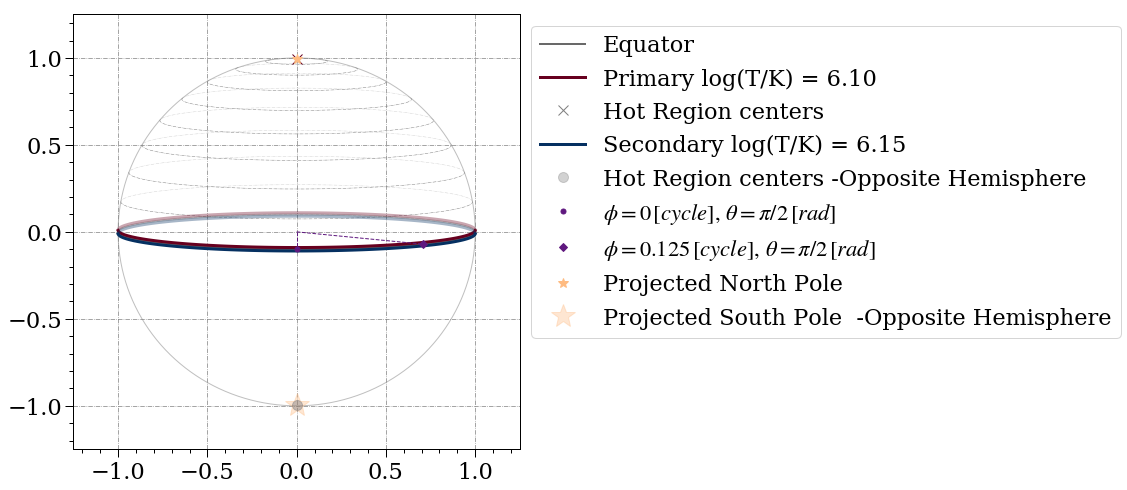

In [16]:
# from Earth and phase 0.
plot_projection_general((P_dictionary_2hsSTU),"ST+ST","I","NP")


In [17]:
import numpy as np

theta = np.linspace(0,np.pi,5)
phi = np.linspace(-np.pi,np.pi,5)
ph,th = np.meshgrid(phi,theta)

d = np.ones((5,5,2))
d[:,:,0] = th[:,:]
print(d[:,:,:-1])
print(d[:,:,-1])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.78539816]
  [0.78539816]
  [0.78539816]
  [0.78539816]
  [0.78539816]]

 [[1.57079633]
  [1.57079633]
  [1.57079633]
  [1.57079633]
  [1.57079633]]

 [[2.35619449]
  [2.35619449]
  [2.35619449]
  [2.35619449]
  [2.35619449]]

 [[3.14159265]
  [3.14159265]
  [3.14159265]
  [3.14159265]
  [3.14159265]]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [18]:
xd1 = (xloc(1)-x(ic11,ic12,1)) / (x(ic21,ic12,1) - x(ic11,ic12,1))

xd2 = (xloc(2)-x(ic11,ic12,2)) / (x(ic11,ic22,2) - x(ic11,ic12,2))

c00 = gf(ic11,ic12) * (1.0d0 - xd1) + gf(ic21,ic12) * xd1
c10 = gf(ic11,ic22) * (1.0d0 - xd1) + gf(ic21,ic22) * xd1

gfloc  = c00 * (1.0d0 - xd2) + c10 * xd2


SyntaxError: invalid syntax (<ipython-input-18-86b145b5a38a>, line 5)